In [2]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [3]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [4]:
df = pd.read_csv(DATA_URL + "telecom_churn.csv")

In [5]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

c:\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Total day calls'}>,
        <AxesSubplot:title={'center':'Total eve calls'}>],
       [<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>]], dtype=object)

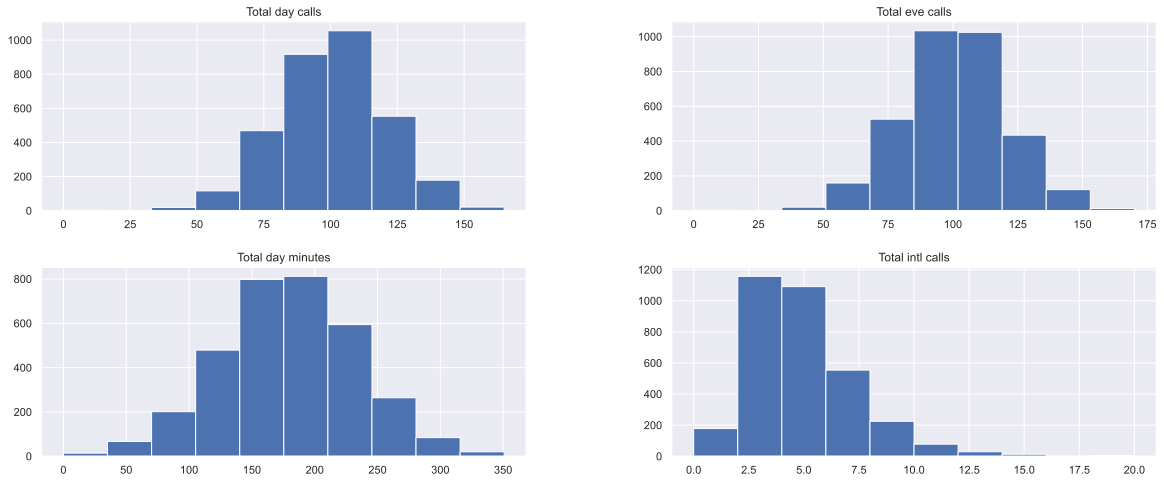

In [6]:
features = ["Total day calls", "Total eve calls", "Total day minutes", "Total intl calls"]
df[features].hist(figsize=(20,8))

c:\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

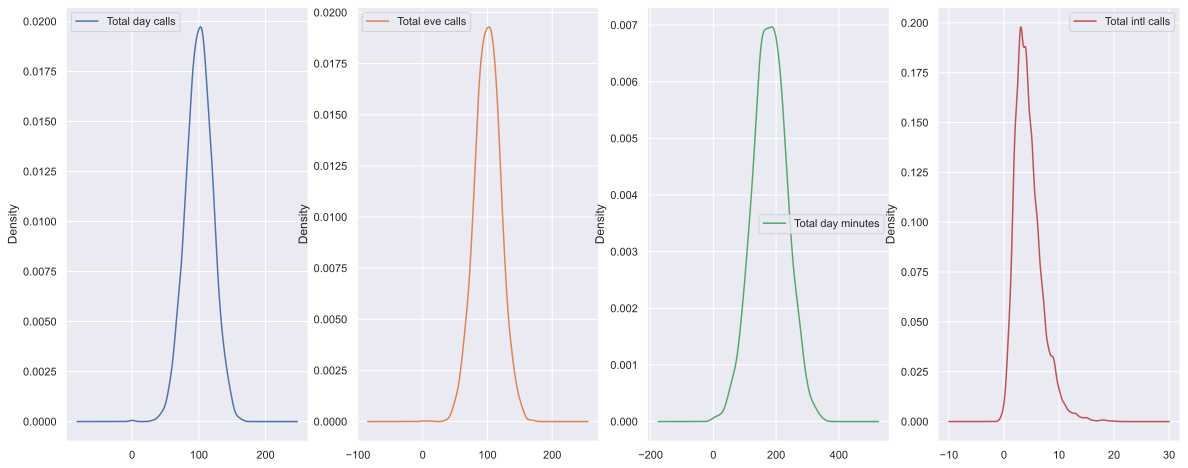

In [7]:
df[features].plot(kind="density", subplots=True, layout=(1,4), sharex = False, figsize=(20,8))

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total intl calls', ylabel='Density'>

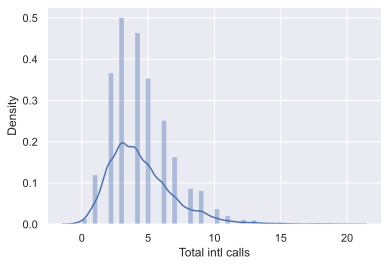

In [8]:
sns.distplot(df["Total intl calls"])

<AxesSubplot:xlabel='Total intl calls'>

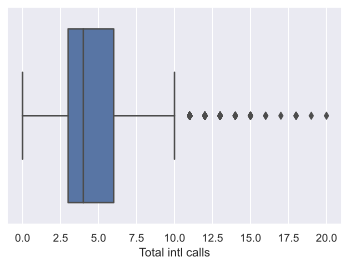

In [9]:
sns.boxplot(x="Total intl calls", data=df)

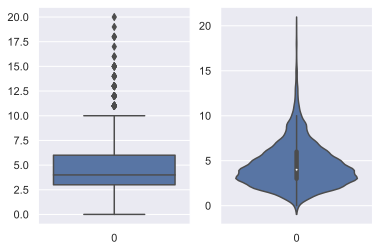

In [10]:
#Violin plot
_, axes = plt.subplots(1, 2, sharey=False, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [11]:
df[features].describe()

Total day calls  Total eve calls  Total day minutes  Total intl calls
count      3333.000000      3333.000000        3333.000000       3333.000000
mean        100.435644       100.114311         179.775098          4.479448
std          20.069084        19.922625          54.467389          2.461214
min           0.000000         0.000000           0.000000          0.000000
25%          87.000000        87.000000         143.700000          3.000000
50%         101.000000       100.000000         179.400000          4.000000
75%         114.000000       114.000000         216.400000          6.000000
max         165.000000       170.000000         350.800000         20.000000

In [12]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

<AxesSubplot:>

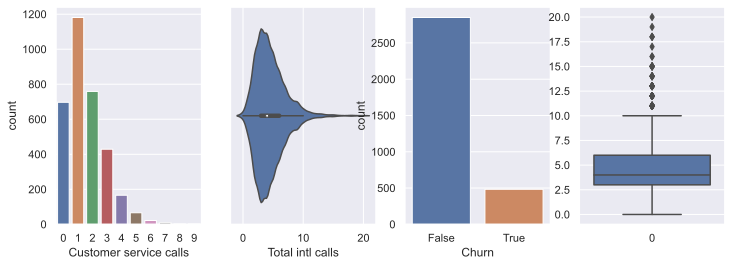

In [13]:
brbrbr, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[2])
sns.countplot(x="Customer service calls", data=df, ax=axes[0]);
sns.violinplot(x="Total intl calls", data=df, ax=axes[1]);
sns.boxplot(data=df["Total intl calls"], ax=axes[3])

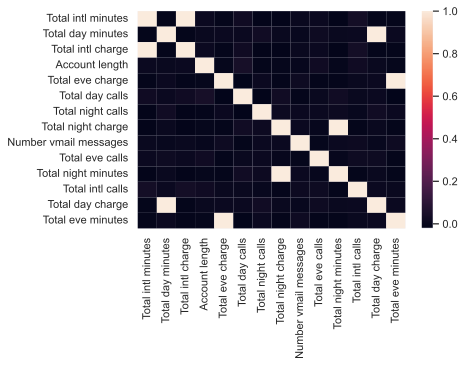

In [14]:
#Quantitative vs. Quantitative
#Correlation matrix

# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

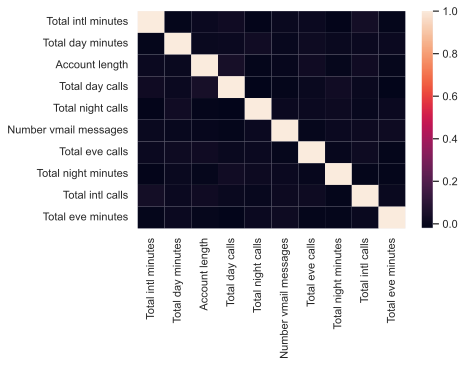

In [15]:
#Delete dependent variables and can therefore be left out since they do not contribute any additional information. Let’s get rid of them:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

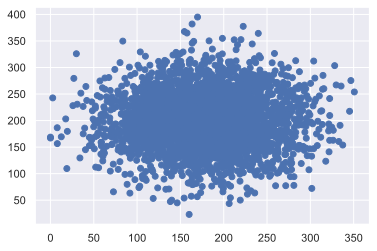

In [16]:
#Scatter plot

plt.scatter(df["Total day minutes"], df["Total night minutes"]);

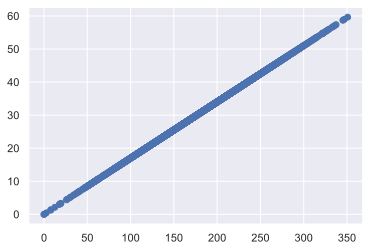

In [17]:
plt.scatter(df["Total day minutes"], df["Total day charge"]);

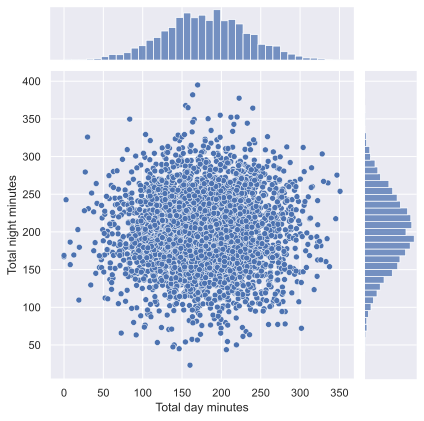

In [18]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


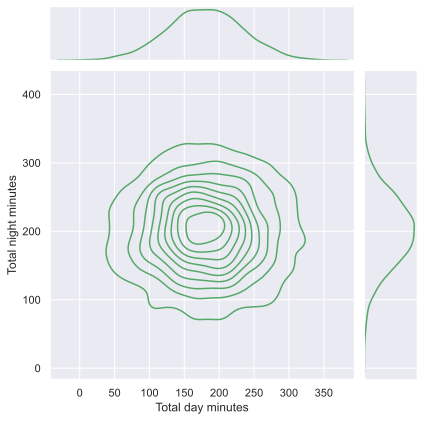

In [19]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
);

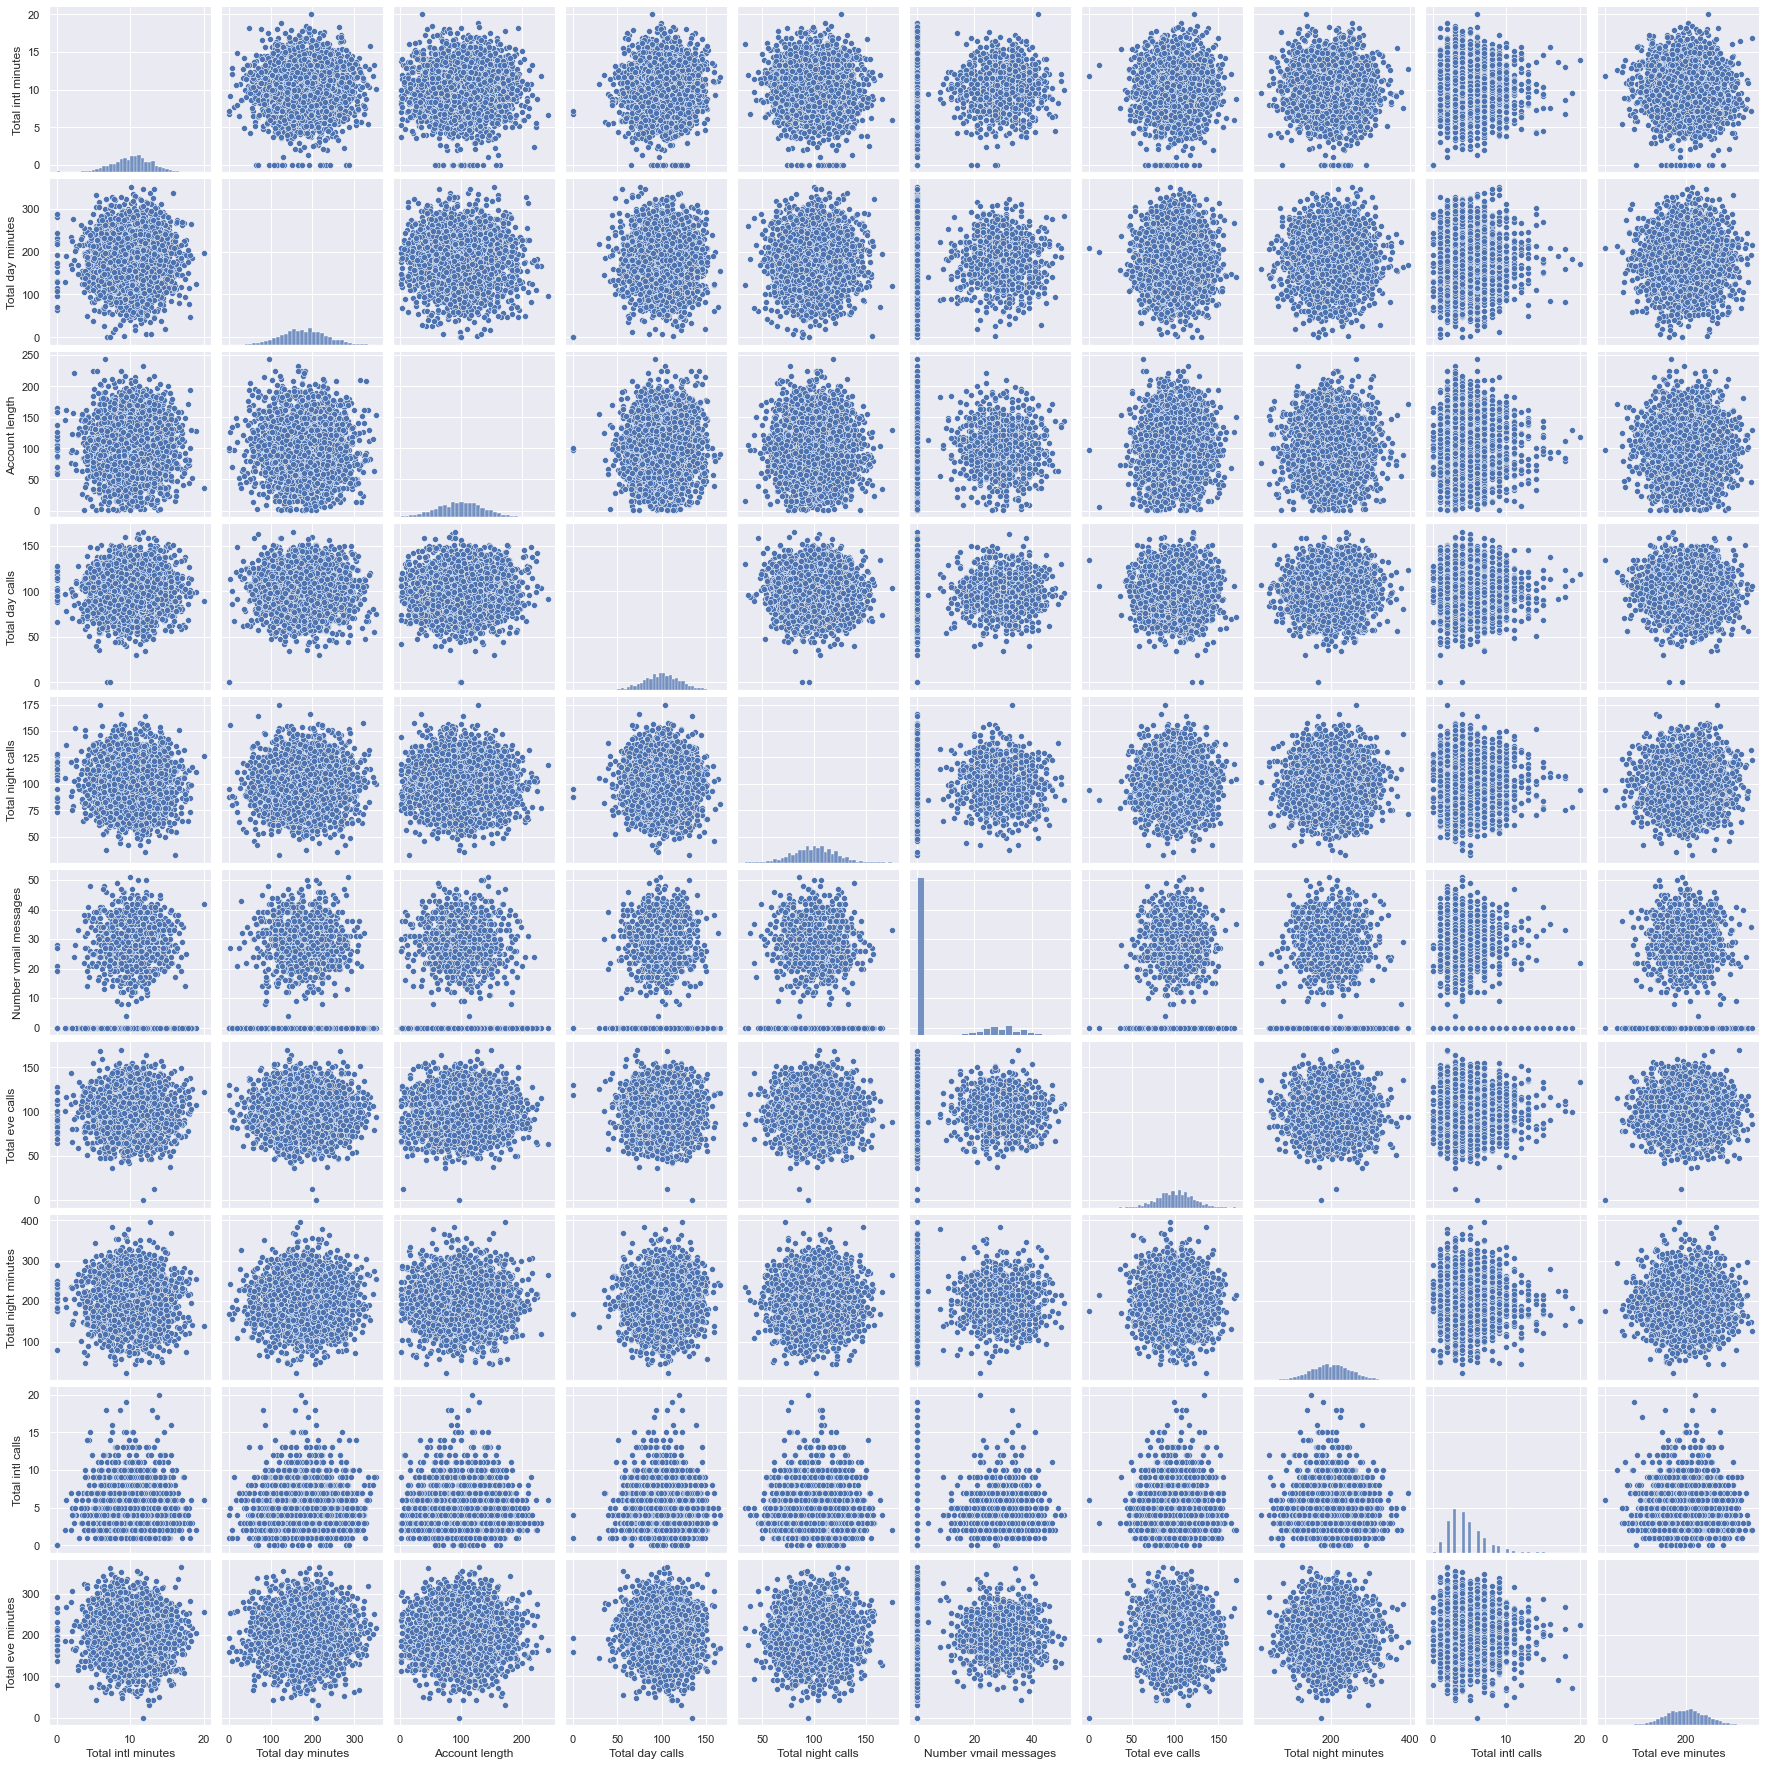

In [20]:
#Scatterplot matrix
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [21]:
%config InlineBackend.figure_format = 'svg'

c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


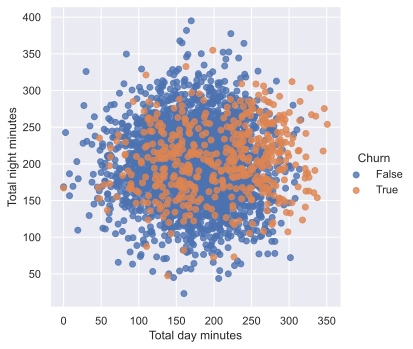

In [22]:
#Quantitative vs. Categorical
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
);

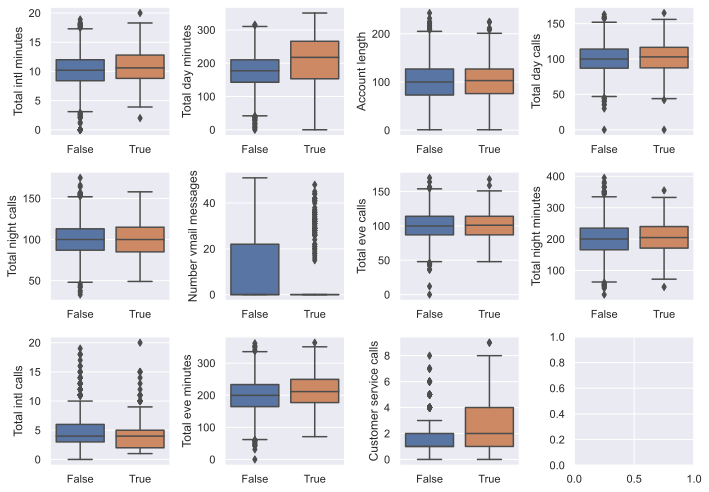

In [23]:
#box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (Churn=False) and those who left (Churn=True).
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

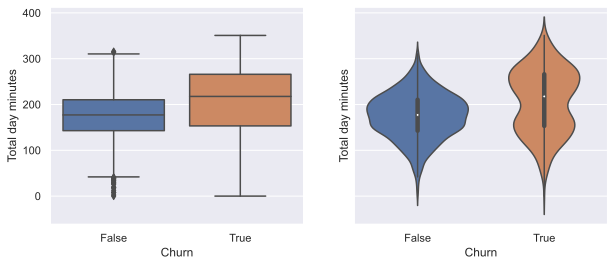

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

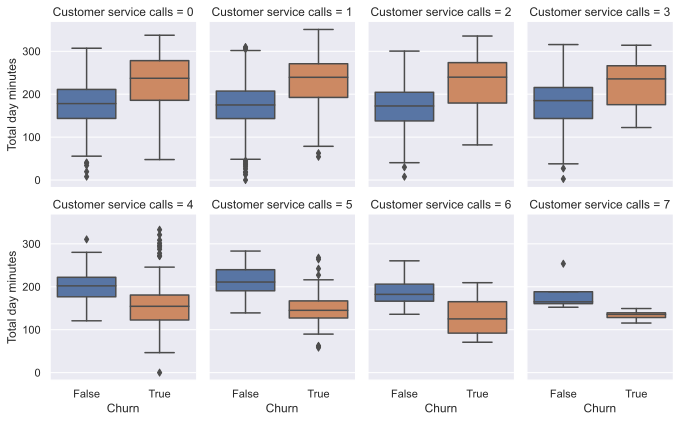

In [25]:
#Analyze a quantitative variable in two categorical dimensions at once:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);


In [26]:
#Contingency table
pd.crosstab(df["State"], df["Churn"], margins=True).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  TN  TX  UT  VA  VT  WA  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8  ...   5  18  10   5   8  14   
All    52  80  55  64  34  66  74  54  61  63  ...  53  72  72  77  73  66   

State  WI   WV  WY   All  
Churn                     
False  71   96  68  2850  
True    7   10   9   483  
All    78  106  77  3333  

[3 rows x 52 columns]

In [27]:
pd.crosstab(df["Total day minutes"], df["Churn"], margins=True).T

Total day minutes  0.0  2.6  7.8  7.9  12.5  17.6  18.9  19.5  25.9  27.0  \
Churn                                                                       
False                1    1    1    1     1     1     1     1     1     1   
True                 1    0    0    0     0     0     0     0     0     0   
All                  2    1    1    1     1     1     1     1     1     1   

Total day minutes  ...  328.1  329.8  332.9  334.3  335.5  337.4  345.3  \
Churn              ...                                                    
False              ...      0      0      0      0      0      0      0   
True               ...      1      1      1      1      1      1      1   
All                ...      1      1      1      1      1      1      1   

Total day minutes  346.8  350.8   All  
Churn                                  
False                  0      0  2850  
True                   1      1   483  
All                    1      1  3333  

[3 rows x 1668 columns]

In [28]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [29]:
#Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [30]:
 #leave out the State and Churn features and convert the values “Yes”/”No” of the binary features into numerical values using pandas.Series.map():

X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [31]:
X

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9                 6               2.67   
3329                 9.6              

In [32]:
#Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
#build a t-SNE representation:
#%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

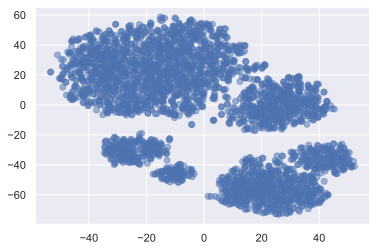

In [34]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);